In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_excel('Dataset/ADHD.xlsx')

In [5]:
df.head()

,Student ID,Differences of Two Pictures,Find the Object,Time Taken to Find the Object,Eye Tracking,Output
0,1,3,Yes,11,Focus,Not ADHD
1,2,7,No,25,Not,Not ADHD
2,3,0,No,37,Not,ADHD
3,4,0,No,59,Focus,ADHD
4,5,3,Yes,53,Focus,ADHD


In [13]:
# Check for basic info about the dataset
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Student ID                     1000 non-null   int64 
 1   Differences of Two Pictures    1000 non-null   int64 
 2   Find the Object                1000 non-null   object
 3   Time Taken to Find the Object  1000 non-null   int64 
 4   Eye Tracking                   1000 non-null   object
 5   Output                         1000 non-null   object
dtypes: int64(3), object(3)
memory usage: 47.0+ KB


In [14]:
# Check for null values in the dataset
print("\nMissing Values in Dataset:")
print(df.isnull().sum())


Missing Values in Dataset:
Student ID                       0
Differences of Two Pictures      0
Find the Object                  0
Time Taken to Find the Object    0
Eye Tracking                     0
Output                           0
dtype: int64


In [15]:
# Check basic statistics for numerical columns
print("\nDescriptive Statistics for Numeric Columns:")
print(df.describe())


Descriptive Statistics for Numeric Columns:
        Student ID  Differences of Two Pictures  Time Taken to Find the Object
count  1000.000000                  1000.000000                    1000.000000
mean    500.500000                     5.000000                      36.162000
std     288.819436                     3.195968                      14.544253
min       1.000000                     0.000000                      10.000000
25%     250.750000                     2.000000                      24.000000
50%     500.500000                     5.000000                      37.000000
75%     750.250000                     8.000000                      49.000000
max    1000.000000                    10.000000                      60.000000


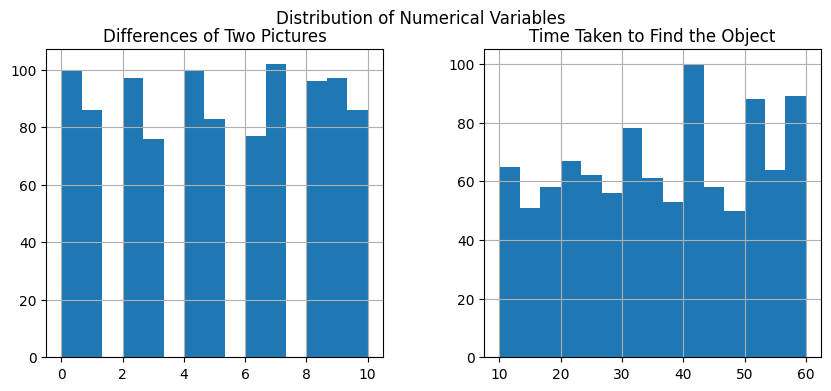

In [27]:
# Visualize the distribution of numerical columns
numerical_cols = ['Differences of Two Pictures', 'Time Taken to Find the Object']
df[numerical_cols].hist(bins=15, figsize=(10, 4))
plt.suptitle("Distribution of Numerical Variables")
plt.show()

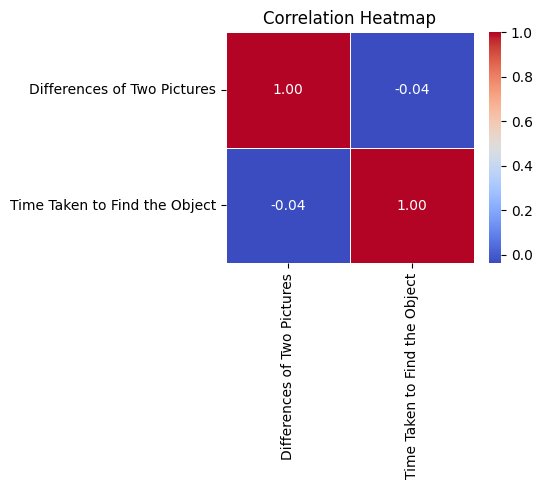

In [29]:
# Correlation Heatmap for numerical columns
plt.figure(figsize=(4, 3))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

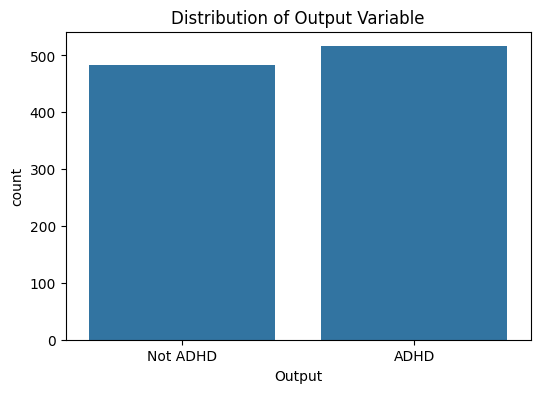

In [30]:
# Visualizing the distribution of the output variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Output', data=df)
plt.title('Distribution of Output Variable')
plt.show()

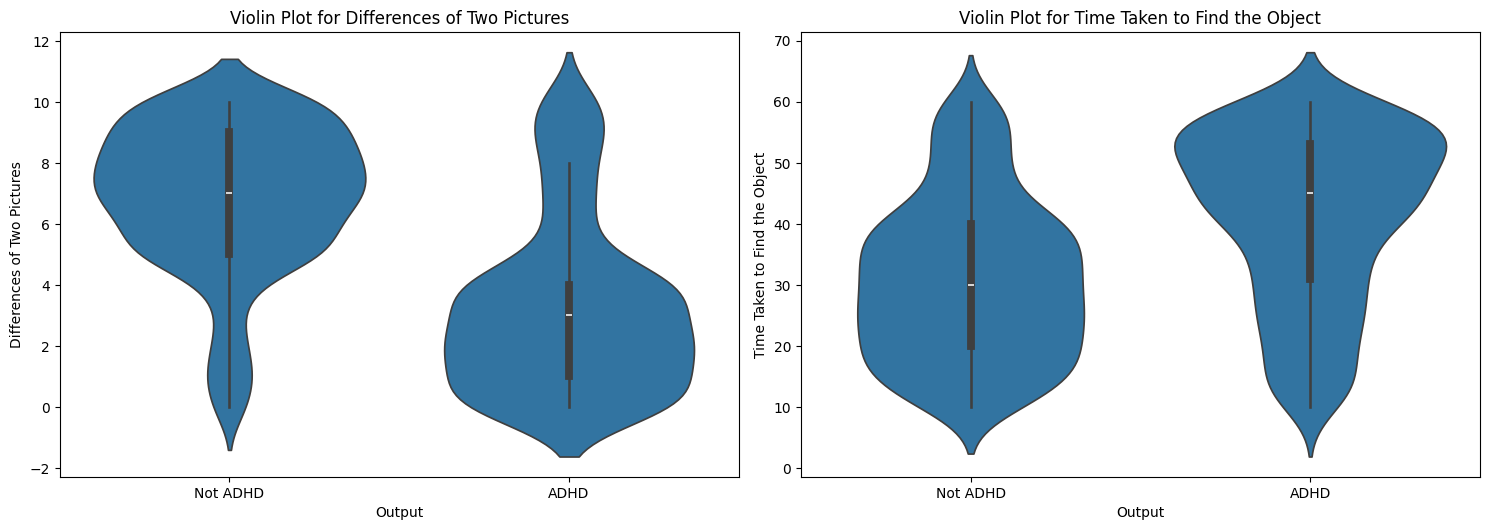

In [31]:
# Violin plot to visualize the distribution of numerical features with respect to Output
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i+1)
    sns.violinplot(x='Output', y=col, data=df)
    plt.title(f'Violin Plot for {col}')
plt.tight_layout()
plt.show()

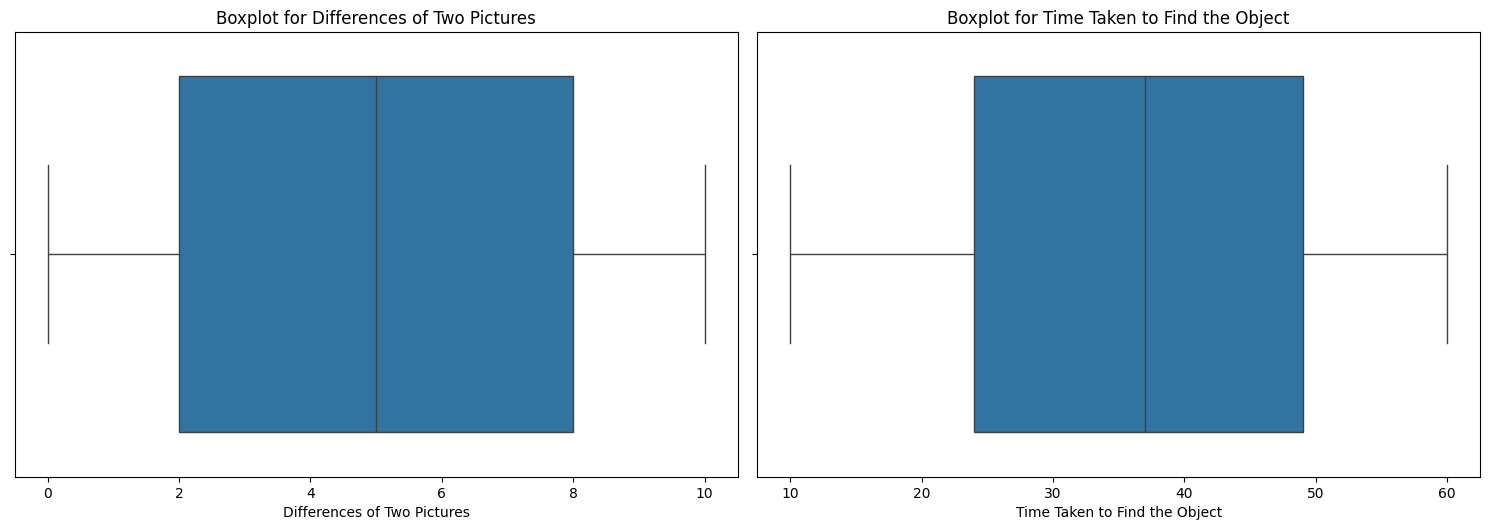

In [32]:
# Boxplots for numerical columns to detect outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
plt.tight_layout()
plt.show()

In [6]:
# Split the dataset
X = df[['Differences of Two Pictures', 'Find the Object', 'Time Taken to Find the Object', 'Eye Tracking']]  # Input features
y = df['Output']  # Output variable

In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Encoding categorical columns
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [9]:
# Define preprocessing pipeline for the input features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), ['Differences of Two Pictures', 'Time Taken to Find the Object']),
        ('cat', OneHotEncoder(), ['Find the Object', 'Eye Tracking'])
    ])

# Define models to be used
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

In [35]:
# Dictionary to store the accuracy of each model
model_accuracies = {}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"\nTraining {model_name}...")

    # Create a pipeline with preprocessing and model
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    
    # Train the model
    pipeline.fit(X_train, y_train_encoded)

    # Predict and evaluate
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test_encoded, y_pred)
    model_accuracies[model_name] = accuracy
    print(f"{model_name} accuracy: {accuracy:.4f}")

    # Save the trained model and encoder
    joblib.dump(pipeline, f"{model_name}_model.pkl")
    joblib.dump(label_encoder, f"label_encoder.pkl")

# Now, the models and label encoders are saved as .pkl files

print("\nModels and encoders have been saved successfully.")


Training Logistic Regression...
Logistic Regression accuracy: 0.8650

Training Random Forest...
Random Forest accuracy: 1.0000

Training SVM...
SVM accuracy: 0.8250

Models and encoders have been saved successfully.


In [36]:
# Load the saved model and encoder
loaded_model = joblib.load('Logistic Regression_model.pkl')
loaded_encoder = joblib.load('label_encoder.pkl')

# Use the model for prediction
new_data = pd.DataFrame({
    'Differences of Two Pictures': [8],
    'Time Taken to Find the Object': [25],
    'Find the Object': ['Yes'],
    'Eye Tracking': ['Focus']
})

# Predict using the loaded model
new_data_encoded = loaded_model.predict(new_data)
predicted_class = loaded_encoder.inverse_transform(new_data_encoded)

print(f"Predicted class: {predicted_class[0]}")


Predicted class: Not ADHD


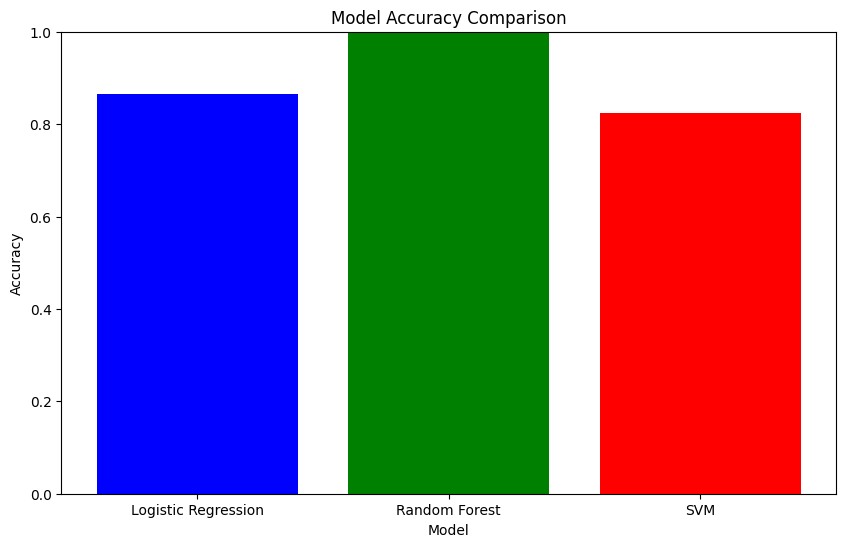

In [37]:
# Plotting model accuracies for comparison
plt.figure(figsize=(10, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color=['blue', 'green', 'red'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.show()